# 练习05对图像应用形态学变换

In [12]:
# from google.colab import drive
# drive.mount('/content/drive')

#### 

In [13]:
# cd /content/drive/My Drive/C13550/Lesson02/Exercise02

#### 

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#### 灰度处理

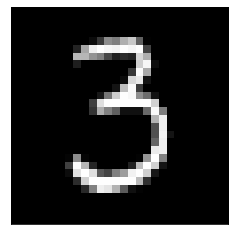

In [15]:
img = cv2.imread('three.png',0)
plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.savefig('ex2_1.jpg', bbox_inches='tight')
plt.show()

#### cv2.erode

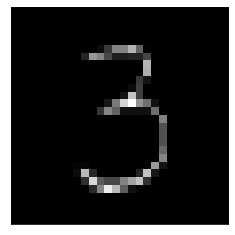

In [16]:
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.savefig('ex2_2.jpg', bbox_inches='tight')
plt.show()

#### cv2.erode

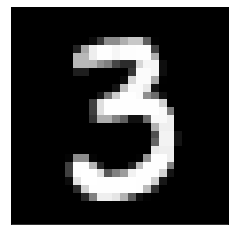

In [17]:
kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.savefig('ex2_3.jpg', bbox_inches='tight')
plt.show()


#### 膨胀操作

In [18]:
import random
random.seed(42)
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

def sp_noise_on_figure(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                if image[i][j] > 100:
                    output[i][j] = 0
            else:
                output[i][j] = image[i][j]
    return output


#### 

In [19]:
kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
noise_img = sp_noise(dilation,0.05)
noise_img_on_image = sp_noise_on_figure(dilation,0.15)
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(noise_img_on_image, cv2.MORPH_CLOSE, kernel)

#### 

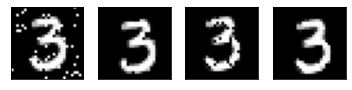

In [20]:
images = [noise_img,opening,noise_img_on_image,closing]
for i in range(4):
    plt.subplot(1,4,i+1),plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.savefig('ex2_4.jpg', bbox_inches='tight')
plt.show()

#### 